In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mtn_customer_churn.csv')

print(df.info())
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [ ]:
""" Data Cleaning """

In [18]:
# Check for missing values
print(df.isnull().sum())

# Filling missing 'Reasons for Churn' for non-Churned customers
df['Reasons for Churn'] = df['Reasons for Churn'].fillna('Not Applicable')

# Drop Duplicates Values
df = df.drop_duplicates()

df.info()


Customer ID                  0
Full Name                    0
Date of Purchase             0
Age                          0
State                        0
MTN Device                   0
Gender                       0
Satisfaction Rate            0
Customer Review              0
Customer Tenure in months    0
Subscription Plan            0
Unit Price                   0
Number of Times Purchased    0
Total Revenue                0
Data Usage                   0
Customer Churn Status        0
Reasons for Churn            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State         

In [ ]:
""" Fix Data Types """

df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format='%b-%y')

In [23]:
""" Exploratory Data Analysis (EDA) """
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,2025-01-01,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,2025-03-01,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,Not Applicable
3,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,Not Applicable
4,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,Not Applicable


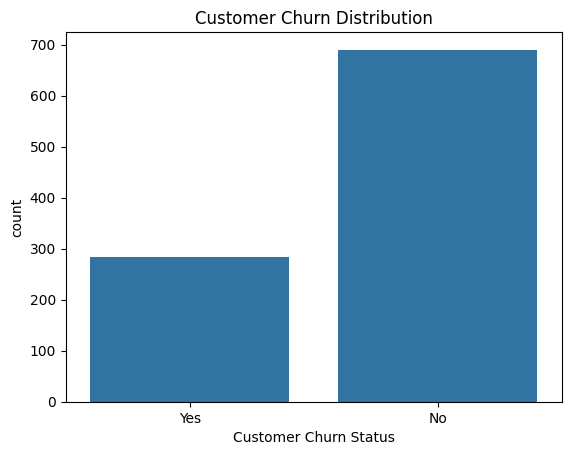

In [29]:
# Churn Distribution
sns.countplot(x='Customer Churn Status', data=df)
plt.title('Customer Churn Distribution')
plt.show()

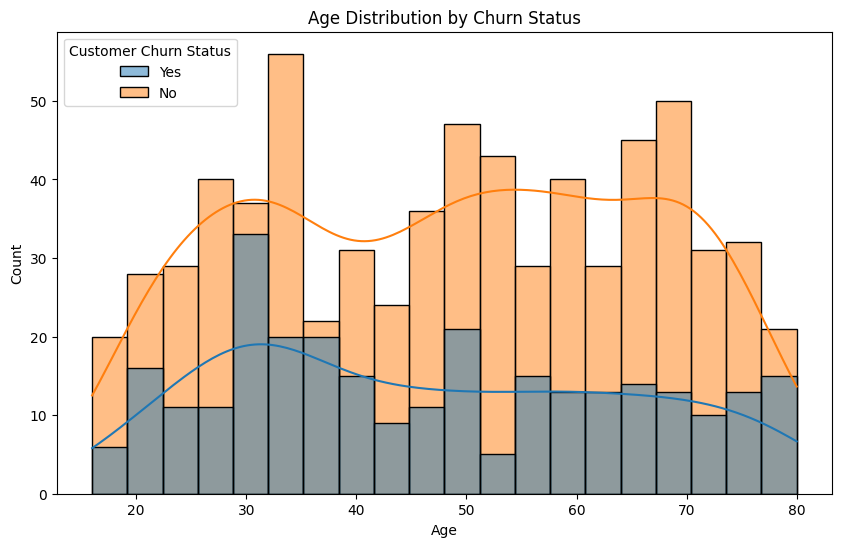

In [27]:
# Churn by age
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Customer Churn Status', kde=True, bins=20)
plt.title('Age Distribution by Churn Status')
plt.show()

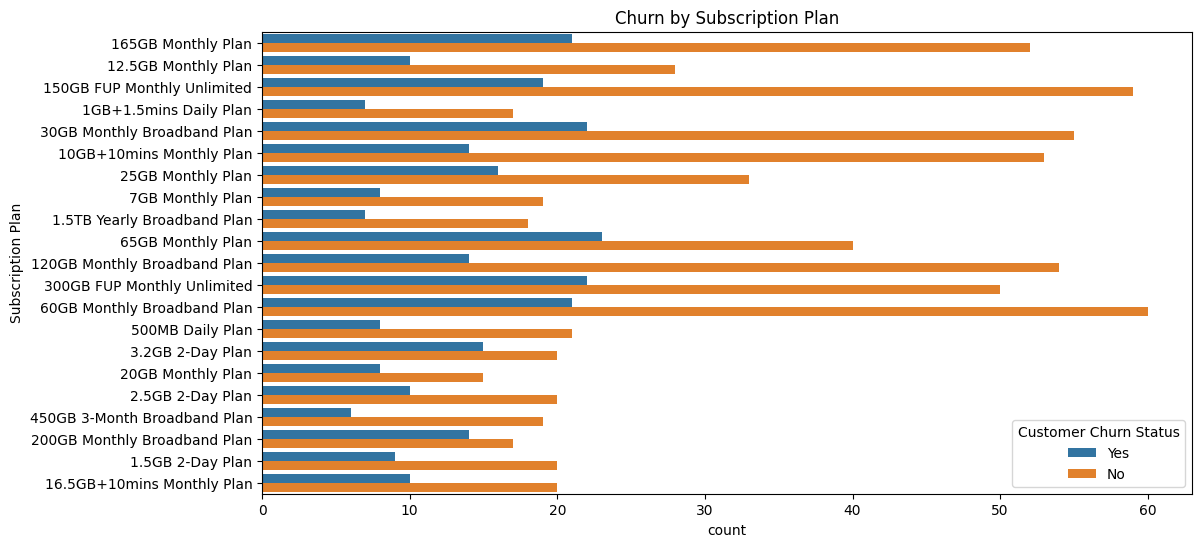

In [31]:
# Churn by Subscription Plan
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Subscription Plan', hue='Customer Churn Status')
plt.title('Churn by Subscription Plan')
plt.show()

In [47]:
# Top Reasons for Churn
churned = df[df['Customer Churn Status'] == 'Yes']
reason = pd.DataFrame(churned)

fig = px.bar(reason, y='Reasons for Churn', title="Reasons for Churn")

fig.update_layout(
    title_x= 0.5,
)

fig.show()

In [ ]:
""" Advance Analysis """

Customer Churn Status
No     141348000
Yes     58000200
Name: Total Revenue, dtype: int64


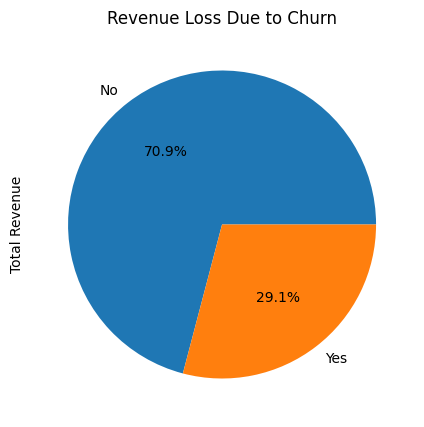

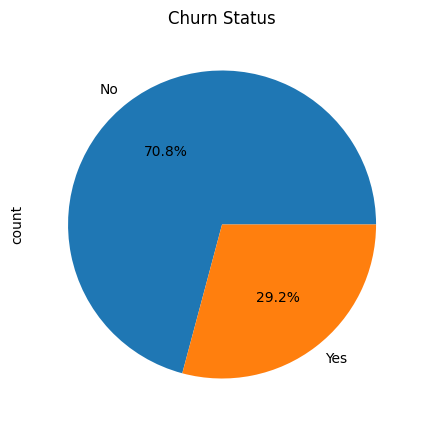

In [62]:
# Revenue Impact of Churn
churn_revenue = df.groupby('Customer Churn Status')['Total Revenue'].sum()
print(churn_revenue)

plt.figure(figsize=(8,5))
churn_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Loss Due to Churn')
plt.show()

churn_pct = df['Customer Churn Status'].value_counts()
plt.figure(figsize=(8,5))
churn_pct.plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Status')
plt.show()

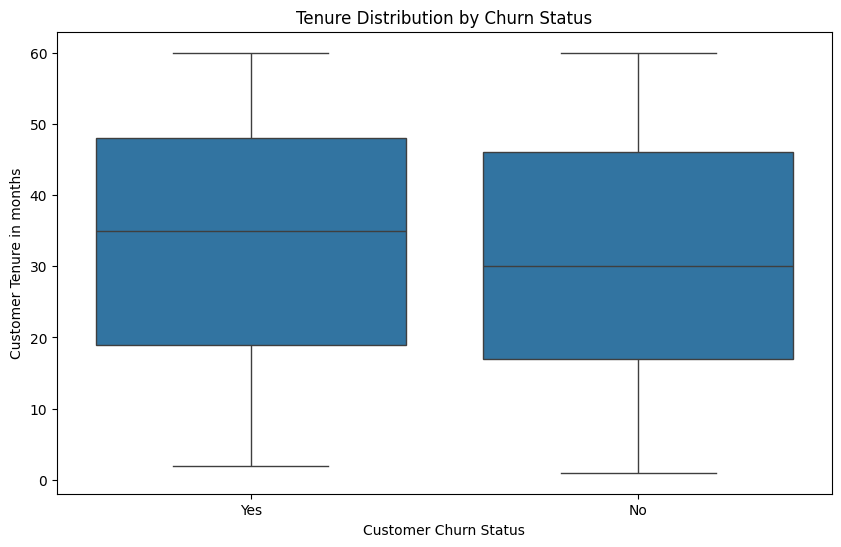

In [51]:
# Customer Tenure vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Customer Churn Status', y='Customer Tenure in months')
plt.title('Tenure Distribution by Churn Status')
plt.show()

In [ ]:
""" Key Insights
From the analysis:
1. Churn Rate: 29.2% of customers churned.
2. Top Reasons: "High Call Tariffs", "Poor Network" and "Better Offers from Competitors" are the most common reasons
3. Revenue Impact: Churned customers contributed to 29.1% of total revenue.
"""

In [63]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,2025-01-01,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,2025-03-01,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,Not Applicable
3,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,Not Applicable
4,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,Not Applicable


In [ ]:
# 1. Which state has the highest churn rate?
churn_by_state = df.groupby('State')['Customer Churn Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)

top_churn_state = churn_by_state.idxmax()
top_churn_rate = churn_by_state.max()

print(f"State with highest churn rate: {top_churn_state} ({top_churn_rate:.1f}%)")

fig = px.bar(churn_by_state.head(10), x='Customer Churn Status', labels={'Customer Churn Status': "Churn Rate (%)"})
fig.update_layout(
    title_text="Top 10 States by Churn Rate",
    title_x=0.5,
    color_discrete_map={''}
)
fig.show()

# Churn Rates by Device
device_churn_rate = df.groupby('MTN Device')['Customer Churn Status'].apply(lambda x: 
    (x == 'Yes').mean().round(2) *100).sort_values(ascending=False)

fig = px.bar(device_churn_rate, x='Customer Churn Status', title='Device by Churn Rate (%)',  labels={'Customer Churn Status': 'Churn Rate (%)'})
fig.update_layout(
    title_x=0.5
)
fig.show()

# Churn Rates by Gender
gender_churn_rate = df.groupby('Gender')['Customer Churn Status'].apply(lambda x:
    (x == 'Yes').mean().round(2) * 100)

fig = px.bar(gender_churn_rate, x='Customer Churn Status', title='Gender by Churn Rate (%)', labels={'Customer Churn Status': 'Churn Rate (%)'})
fig.update_layout(
    title_x=0.5
)
fig.show()

State with highest churn rate: Adamawa (61.1%)


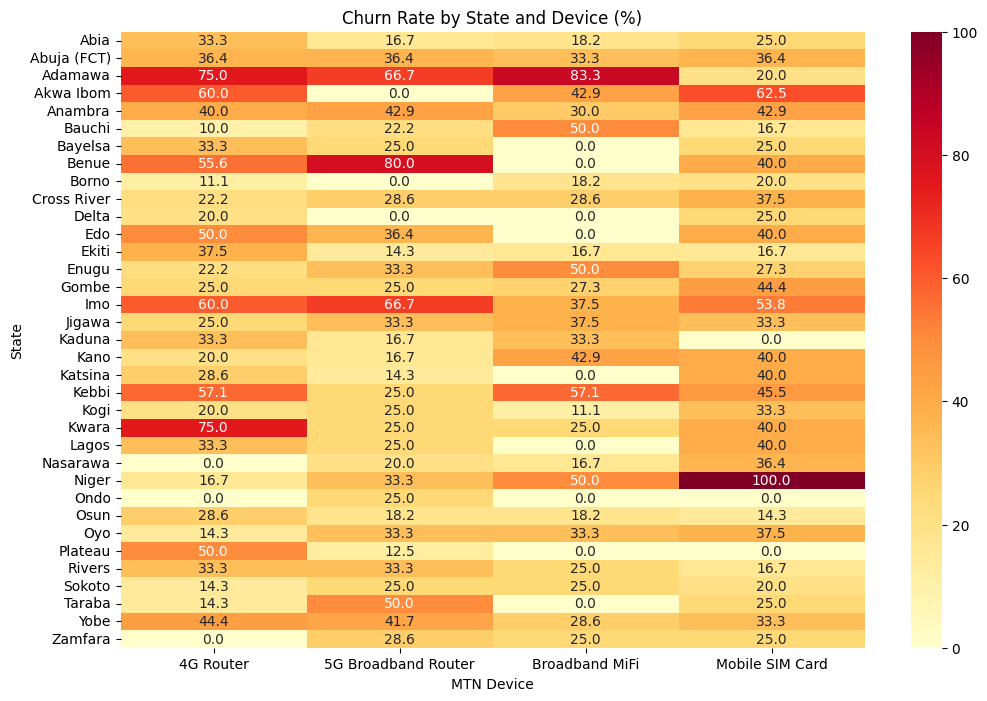

MTN Device   4G Router  5G Broadband Router  Broadband MiFi  Mobile SIM Card
State                                                                       
Abia         33.333333            16.666667       18.181818        25.000000
Abuja (FCT)  36.363636            36.363636       33.333333        36.363636
Adamawa      75.000000            66.666667       83.333333        20.000000
Akwa Ibom    60.000000             0.000000       42.857143        62.500000
Anambra      40.000000            42.857143       30.000000        42.857143
Bauchi       10.000000            22.222222       50.000000        16.666667
Bayelsa      33.333333            25.000000        0.000000        25.000000
Benue        55.555556            80.000000        0.000000        40.000000
Borno        11.111111             0.000000       18.181818        20.000000
Cross River  22.222222            28.571429       28.571429        37.500000
Delta        20.000000             0.000000        0.000000        25.000000

In [281]:
# Multi-index groupby
state_device_churn = df.groupby(['State', 'MTN Device'])['Customer Churn Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).unstack()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(state_device_churn, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Churn Rate by State and Device (%)')
plt.show()

print(state_device_churn)

Correlation:
                   Satisfaction Rate  Churn_Numeric
Satisfaction Rate            1.00000        0.04714
Churn_Numeric                0.04714        1.00000


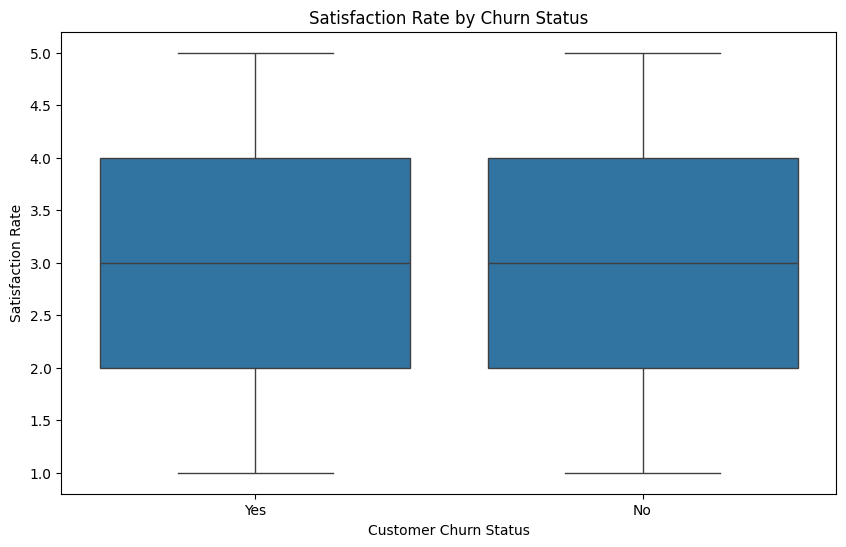

In [ ]:
# 2. is there a correlation between 'Satisfaction Rate' and Churn?
df['Churn_Numeric'] = df['Customer Churn Status'].map({'Yes': 1, 'No': 0}) # Convert churn to binary (1=Yes, 0=No)

# Calculate correlation
correlation = df[['Satisfaction Rate', 'Churn_Numeric']].corr()
print(f"Correlation:\n{correlation}")

# Visualize the relationship
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Customer Churn Status', y='Satisfaction Rate')
plt.title('Satisfaction Rate by Churn Status')
plt.show()